#Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Data Analysis/Youtube Sentiment Analysis

/content/drive/MyDrive/Data Analysis/Youtube Sentiment Analysis


In [3]:
pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=a662426359f5e46982c8c1ffe9aa2d9c4810cc729fe764c1fa4f7bf458f8353f
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sqlalchemy import create_engine
import emoji
import os
import string

In [5]:
comments = pd.read_csv('UScomments.csv', on_bad_lines='warn')

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

<ipython-input-5-72c2392c7a48>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('UScomments.csv', on_bad_lines='warn')


In [6]:
comments

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


#EDA

In [7]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [8]:
comments.dropna(inplace = True)

In [9]:
# creating polarity scores for comments using TextBlob sentiment analysis
polarity = []
for comment in comments["comment_text"]:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
    polarity.append(0)

In [10]:
comments['polarity'] = polarity

In [11]:
comments

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
...,...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0,0.0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,0.0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,0.0
691398,EoejGgUNmVU,Islığı yeter...,0,0,0.0


In [12]:
# filtering comments with positive polarity
filter1 = comments['polarity'] == 1
comments_positive = comments[filter1]

In [13]:
# filtering comments with negative polarity
filter2 = comments['polarity'] == -1
comments_negative = comments[filter2]

In [14]:
# generating word clouds for positive and negative comments
total_comments_postive = ' '.join(comments_positive['comment_text'])
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_postive)

(-0.5, 399.5, 199.5, -0.5)

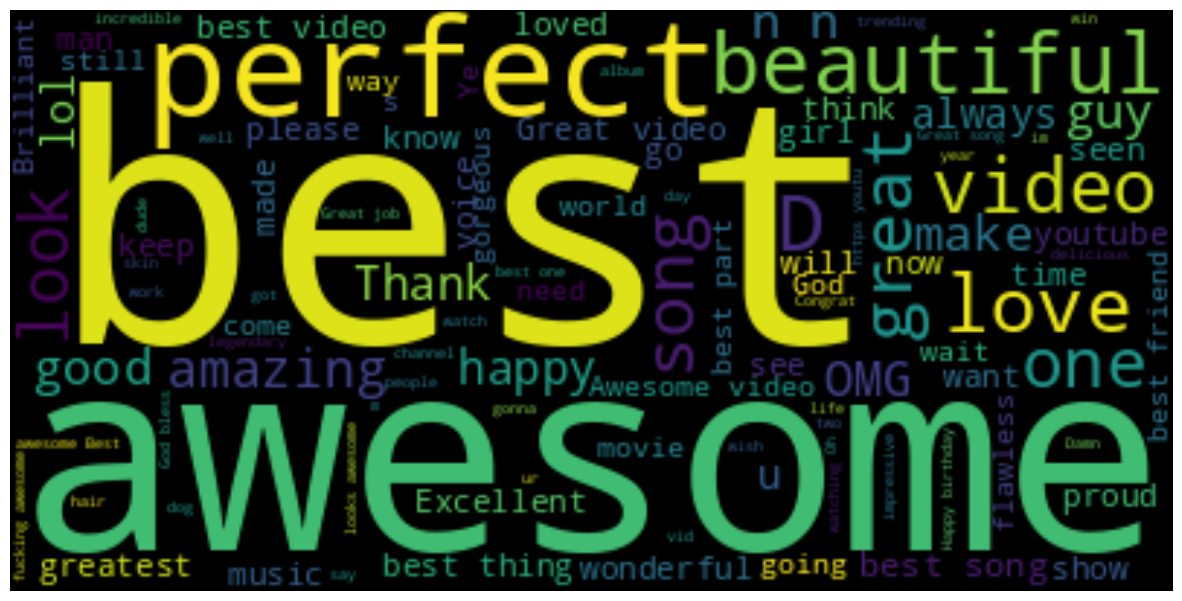

In [15]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_postive), interpolation = 'bilinear')
plt.axis('off')

In [16]:
total_comments_negative = ' '.join(comments_negative['comment_text'])
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

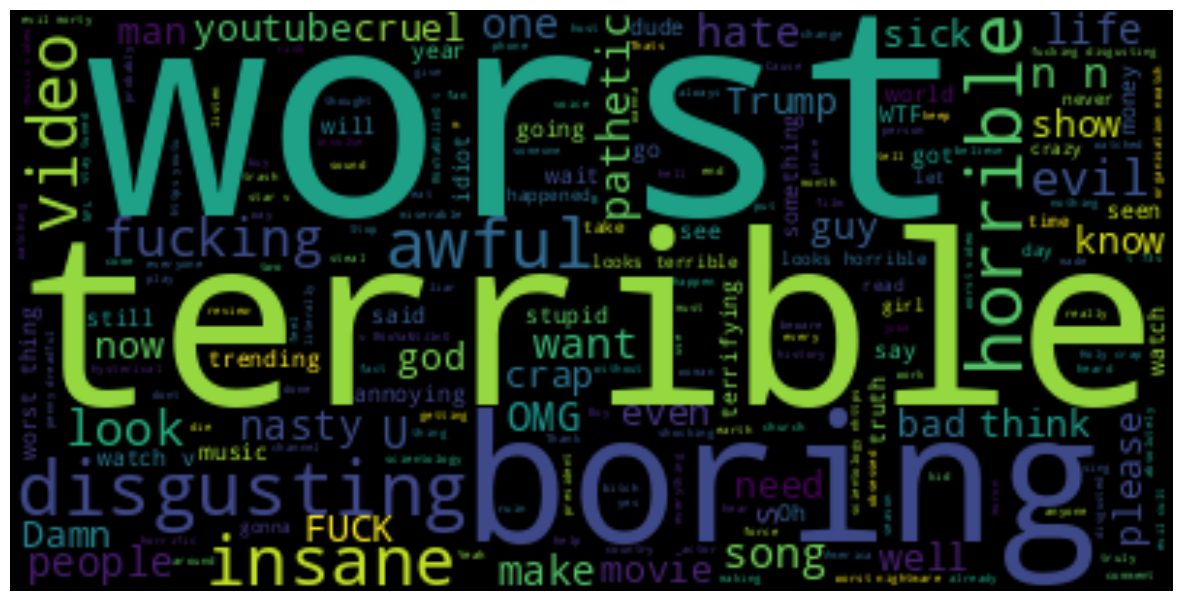

In [17]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_negative), interpolation = 'bilinear')
plt.axis('off')

#Emoji Analysis


In [18]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😍', '❤', '❤', '❤', '😘']

In [19]:
# extracting emojis from comments and counting their occurrences
all_emojis_list = []

for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [20]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [21]:
freq = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]
freq

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [22]:
emojis= [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [23]:
# visualizing emoji frequency using Plotly
fig = px.bar(x=emojis, y=freq)
fig.update_layout(
    title='Emoji Frequency',
    title_x=0.5,
    xaxis_title='Emojis',
    yaxis_title='Frequency'
)
fig.show()

#Exporting Data

In [24]:
files= os.listdir('additional_data')

In [25]:
files_csv = [file for file in files if '.csv' in file]

In [26]:
# combining additional data files and exporting to CSV
full_df = pd.DataFrame()
path = 'additional_data'
for file in files_csv:
  current_df = pd.read_csv(path+'/'+file, encoding = 'iso-8859-1')

  full_df = pd.concat([full_df, current_df], ignore_index = True)

In [27]:
full_df.shape

(375942, 16)

In [28]:
full_df.duplicated().sum()

36417

In [29]:
full_df = full_df.drop_duplicates()

In [30]:
full_df.shape

(339525, 16)

In [31]:
full_df.to_csv('youtube.csv', index = False)

In [32]:
# exporting data to a SQLite database
engine = create_engine('sqlite:///youtube.sqlite')

In [33]:
full_df.to_sql('Users', con = engine, if_exists = 'append')

339525

In [34]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,25,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì 
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375889,aKsKUk4RPLM,18.14.06,There Is One Relation Above All,ActorVarunPruthi,24,2018-06-13T11:04:45.000Z,"varun pruthi|""actor varun pruthi""|""actor varun...",90643,18060,165,4168,https://i.ytimg.com/vi/aKsKUk4RPLM/default.jpg,False,False,False,"There is one Relation above all, Relation of H..."
375890,UPbi1oG5UPg,18.14.06,Engineering Girls | Web Series | S01E02 - Ghar...,The Timeliners,24,2018-06-08T13:54:39.000Z,"funny videos|""hotels""|""comedy""|""comedy video""|...",2675706,96485,4181,6634,https://i.ytimg.com/vi/UPbi1oG5UPg/default.jpg,False,False,False,Maggu is preparing for Sharda University inter...
375891,3MTCSll3KGU,18.14.06,Rusev vs. Samoa Joe - with Special Guest Refer...,WWE,17,2018-06-13T03:09:21.000Z,"wwe|""world wrestling entertainment""|""wrestling...",770873,13316,552,1175,https://i.ytimg.com/vi/3MTCSll3KGU/default.jpg,False,False,False,The Miz serves as special guest referee in thi...
375909,1-0mS2ZBrQk,18.14.06,What If PubG Was Made In India ?,Angry Prash,23,2018-06-11T08:37:21.000Z,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",1214423,85601,4677,7628,https://i.ytimg.com/vi/1-0mS2ZBrQk/default.jpg,False,False,False,This funny video is about what if players unkn...


#Business Questions

## 1- Which category has the maximum likes?

In [35]:
full_df['category_id'].unique()

array([22, 25, 17, 19, 23, 10, 24, 15,  1, 43, 28, 20, 29,  2, 27, 26, 44,
       30])

In [36]:
json_df = pd.read_json('additional_data/US_category_id.json')

In [37]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [38]:
json_df['items'][0]['snippet']['title']

'Film & Animation'

In [39]:
cat_dict = {}

for item in json_df['items'].values:
  cat_dict[int(item['id'])] = item['snippet']['title']

In [40]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'People & Blogs'),
  Text(1, 0, 'News & Politics'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Travel & Events'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Music'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Pets & Animals'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Shows'),
  Text(10, 0, 'Science & Technology'),
  Text(11, 0, 'Gaming'),
  Text(12, 0, 'Nonprofits & Activism'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Education'),
  Text(15, 0, 'Howto & Style'),
  Text(16, 0, 'Trailers'),
  Text(17, 0, 'Movies')])

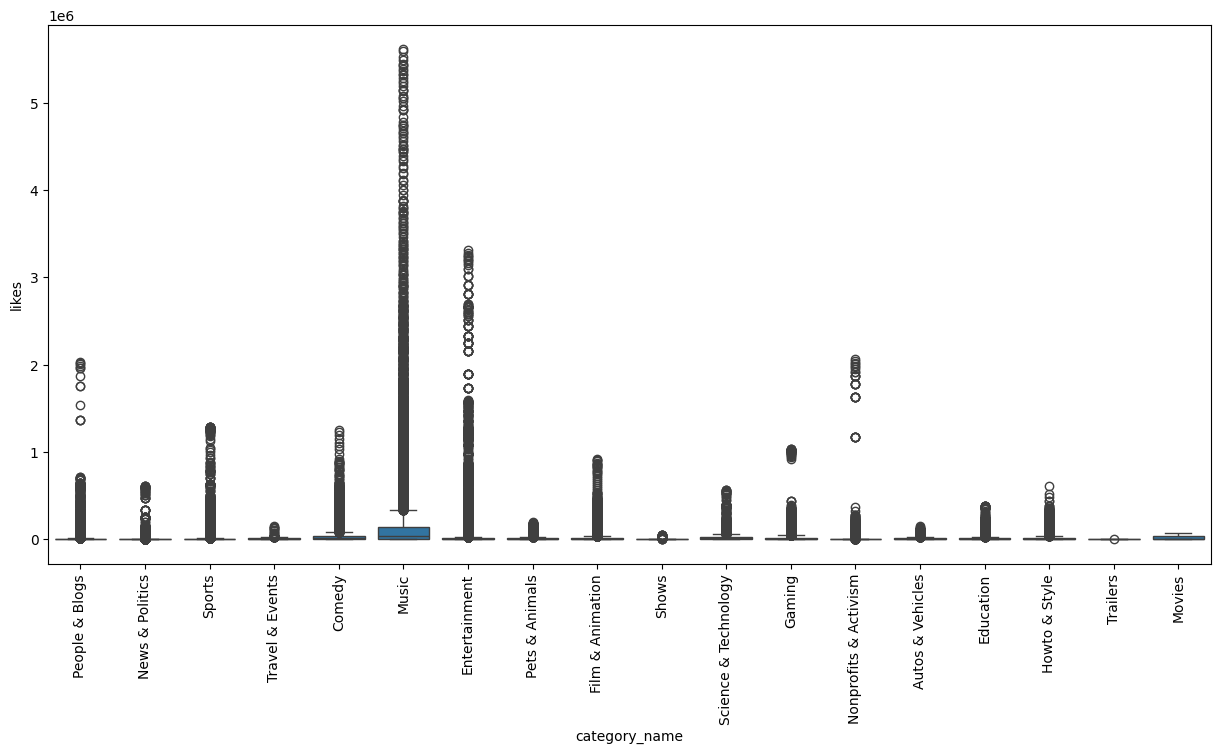

In [41]:
plt.figure(figsize = (15,7))
sns.boxplot(x = 'category_name', y = 'likes', data = full_df)
plt.xticks(rotation = 'vertical')

In [42]:
full_df.groupby('category_name').agg({'likes':'sum'}).sort_values(by = 'likes', ascending = False)
# Music, Entertainment has the max. likes

,likes
category_name,
Music,5867826278
Entertainment,2377832055
Comedy,931444449
People & Blogs,583368312
Film & Animation,437611281
Sports,330258769
Howto & Style,306753785
Gaming,251765515
Science & Technology,203111636


##2- Find out whether audience is engaged or not

In [43]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,RxGQe4EeEpA,17.14.11,ì¢ì by ë¯¼ì_ì¤ì¢ ì _ì¢ë ëµê°,ë¼í¸ë§ì½ë¦¬ì,22,2017-11-13T07:07:36.000Z,"ë¼í¸ë§|""ì¤ì¢ ì ""|""ì¢ë""|""ì¢ì""|""ì¬ë ...",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,ì¤ì¢ ì 'ì¢ë'ì ëµê° 'ì¢ì' ìµì´ ê...,People & Blogs
1,hH7wVE8OlQ0,17.14.11,JSA ê·ì ë¶íêµ° ì´ê²© ë¶ì,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""ê·ì""|""ë¶íêµ°""|""ì´ê²©""|""ë¶ì""|""JS...",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[ì±ëAë¨ë ]å ë³ì¬ íì¬ 'ììë¶ëª ...,News & Politics
2,9V8bnWUmE9U,17.14.11,ëëª°ë¼í¨ë°ë¦¬ ì´ëí ìì 2í (ë¹¼ë...,ëëª°ë¼í¨ë°ë¦¬ í«ì¼,22,2017-11-11T07:16:08.000Z,"ìëë¤ì¤|""ë¹¼ë¹¼ë¡""|""í«ì¼""|""ëëª°ë¼í...",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,í¼ê°ì¤ë ê¼­ ì¶ì² ë¶íëë ¤ì,People & Blogs
3,0_8py-t5R80,17.14.11,"áá µáá §á¼áá ¡á¨ ì¶êµ­ íì¥, ëì¹...",ë¯¸ëì´ëª½êµ¬,25,2017-11-12T11:19:52.000Z,"ì´ëª ë°|""ì´ëª ë° ì¶êµ­ê¸ì§""|""ì´ëª ë° ...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,ë¤ì¤ë ëêµ¬ê²ëê¹ ë£ê³ ë í íì ,News & Politics
4,bk55RbxiQdI,17.14.11,ê¹ì¥ê²¸ì ë¬¼ë¬ê°ë¤ MBC ë ¸ì¡° íí¸ì...,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""ë ¸ì»·V""|""CBS""|""mbc""|""ê¹ì¥ê²¸""|""í´ì...",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,ê¹ì¥ê²¸ MBC ì¬ì¥ì´ ê²°êµ­ í´ìëë¤.\n...,News & Politics


In [44]:
# calculating the engagement rates
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

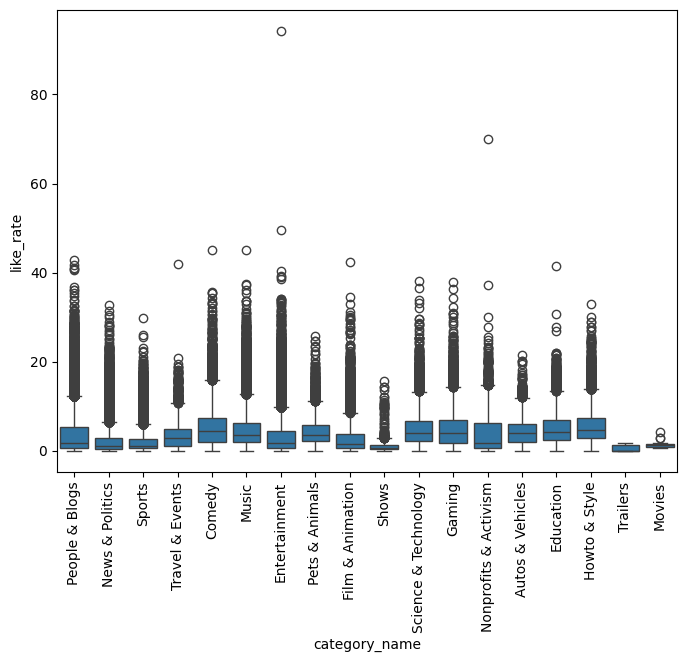

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x ='category_name' , y ='like_rate' , data = full_df)
plt.xticks(rotation ='vertical')
plt.show()
# comedy, gaming, music, science & technology his high like rate

<Axes: xlabel='views', ylabel='likes'>

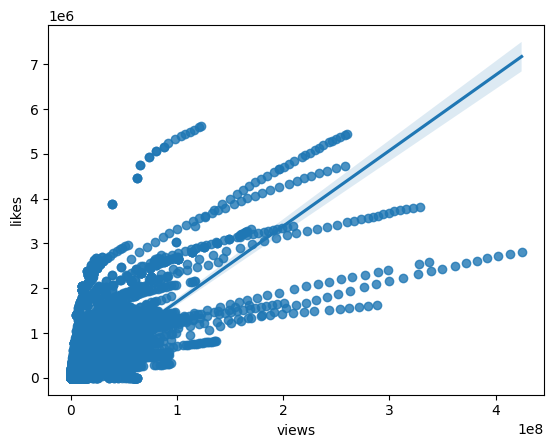

In [46]:
# analysing relationship between views & likes using regression plot
sns.regplot(x='views' , y='likes' , data = full_df)
# there is a positive correlation with the number of likes, videos with higher view counts tend to attract more likes from viewers

<Axes: >

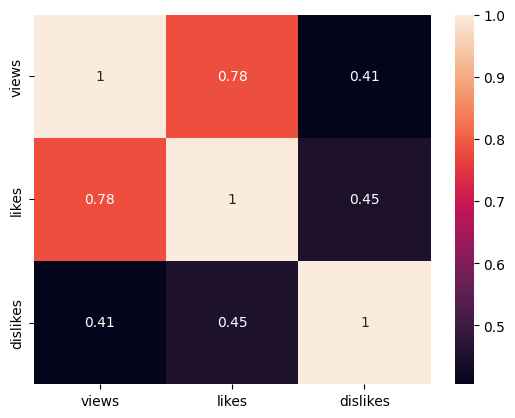

In [47]:
# creating heatmap to visualize the correlation between views, likes and dislikes
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr() , annot=True)

##3- Which channels have the largest number of trending videos?

In [48]:
# identifying which channels have the largest number of trending videos
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [49]:
cdf.columns = ['channel_title', 'total_videos']

In [50]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [51]:
px.bar(data_frame=cdf[0:20] , x='channel_title' , y='total_videos')

##4- Does punctuations in title and tags have any relation with views, likes, dislikes comments?

In [52]:
# examining whether the presence of punctuation in titles and tags correlates with views
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [53]:
full_df['count_punc'] = full_df['title'].apply(punc_count)

In [54]:
fig = px.bar(full_df, x='count_punc', y='views', color_discrete_sequence=['blue'], opacity=0.8)

fig.update_layout(
    title='Bar Chart of Views by Punctuation Count',
    xaxis_title='Punctuation Count',
    yaxis_title='Views'
)

fig.show()
# punctuation count of 1,2,3 has more views

Output hidden; open in https://colab.research.google.com to view.

In [55]:
fig = px.bar(full_df, x='count_punc', y='likes', color_discrete_sequence=['blue'], opacity=0.8)

fig.update_layout(
    title='Bar Chart of Likes by Punctuation Count',
    xaxis_title='Punctuation Count',
    yaxis_title='Likes'
)

fig.show()
# punctuation count of 1,2,3 has more likes

Output hidden; open in https://colab.research.google.com to view.